In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv("./gld_price_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [3]:
df=df.drop(["Date"],axis=1)
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: >

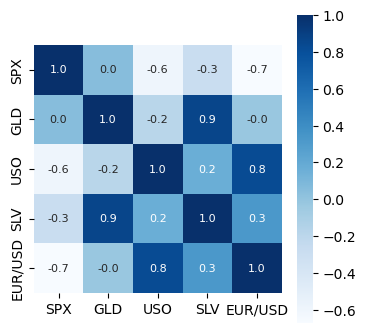

In [4]:
correlation = df.corr()
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(4,4))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

C:\Users\pc\AppData\Local\Temp\ipykernel_10480\579954715.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

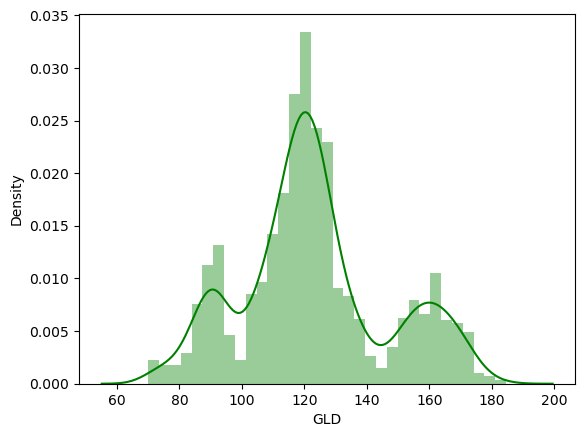

In [5]:
# checking the distribution of the GLD Price
sns.distplot(df['GLD'],color='green')

In [6]:
x_train=df.drop(["GLD"],axis=1).values
y_train=df['GLD'].values
#splitting data and normlizing 
normlize=StandardScaler()
x_norm=normlize.fit_transform(x_train)
x_norm,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=41)

In [7]:
max_dgree=9
err_cv=np.zeros(max_dgree)
err_train=np.zeros(max_dgree)
for i in range(max_dgree):
    pol=PolynomialFeatures(i+1,include_bias=False)
    # normlize data training
    x_pol=pol.fit_transform(x_norm)
    # normlize data cv
    x_p=pol.fit_transform(x_test)
    # train model 
    model=LinearRegression()
    model.fit(x_pol,y_train)
    # prediction 
    y_hat_cv=model.predict(x_p)
    y_hat=model.predict(x_pol)
    err_cv[i]=mean_squared_error(y_test,y_hat_cv)/2
    err_train[i]=mean_squared_error(y_train,y_hat)/2
optimal_degree=np.argmin(err_cv)+1
print(optimal_degree)
print(err_train)
print(err_cv)

7
[ 32.68228103  11.40670152   8.62633739  18.36175967 202.78663152
   7.68584404   6.92466658   7.21428093  14.27312952]
[ 29.98065545  10.3523045    8.67054746  21.03821851 212.65509477
   8.60835521   7.20299987   7.34366019  16.25205378]


In [8]:
pol=PolynomialFeatures(optimal_degree,include_bias=False)
x_train=pol.fit_transform(x_norm)
x_test=pol.fit_transform(x_test)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
error_score =r2_score(y_test, y_pred)
print("R squared Error : ", error_score*100)
for i in range(20):
    print(y_pred[i],"=>",y_test[i])

R squared Error :  97.0741879785057
121.69948798806047 => 124.239998
128.92380104024062 => 127.599998
89.83728566715627 => 93.089996
92.5862294077092 => 93.279999
127.24288041153352 => 127.440002
109.99701205590384 => 107.129997
106.43566035602191 => 103.019997
109.85602184283664 => 106.080002
133.26369780049765 => 137.240005
134.82213197480917 => 135.119995
122.2503897278167 => 124.669998
162.2531879871441 => 161.960007
114.16070095151383 => 113.529999
127.8887471041163 => 124.489998
122.08466764812704 => 124.589996
121.80811846937479 => 124.769997
90.79735455865932 => 90.080002
122.60400281958403 => 124.959999
109.64170215506977 => 110.400002
115.92209540367378 => 114.739998
